<a href="https://colab.research.google.com/github/prophets-of-eternity/summer-2021-v3/blob/main/ACM_PP_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note Google CoLab")
    COLAB = False



Mounted at /content/drive
Note: using Google CoLab


In [ ]:
!pip install pytz
!pip install https://github.com/neuropsychology/neurokit/zipball/master

     / 155.9 MB 41.4 MB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for neurokit2: filename=neurokit2-0.1.3-py2.py3-none-any.whl size=1010309 sha256=9940225695facc01ccb1bfcc9b517282263a6e6c222f1df9bf84852d3275dba8
  Stored in directory: /tmp/pip-ephem-wheel-cache-p4o8l77k/wheels/f9/ab/f2/fd4a1736f76af31efe92b48862a9b15d383fd35cebc6010ed5
Successfully built neurokit2


In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import pytz
import os
import matplotlib.pyplot as plt
import neurokit2 as nk
from scipy import signal
import csv

In [ ]:
def condition(value):
    if value <= 13:
        return 0 #minimal
    elif (value>=14) and (value<=19):
        return 1 #mild
    elif (value>=20) and (value<=28):
        return 2 #moderate
    elif value >= 29:
        return 3 #severe


def timeconversion(value):
  # print(pytz.all_timezones)
  tz = pytz.timezone('Asia/Shanghai')
  return datetime.fromtimestamp(value/1000, tz=tz).strftime('%Y-%m-%d %H:%M:%S')

def endtime(value):
  # print(pytz.all_timezones)
  tz = pytz.timezone('Asia/Shanghai')
  return datetime.fromtimestamp((value-1.8e+6)/1000, tz=tz).strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
DATA_PATH = "/content/drive/MyDrive/ACMV1/Stress&Mood/trait.xlsx - Pre-test.csv"

df = pd.read_csv(DATA_PATH)
df = df[['Participant ID', 'BDI-II_1', 'BDI-II_2', 'BDI-II_3', 'BDI-II_4', 'BDI-II_5', 'BDI-II_6', 'BDI-II_7', 'BDI-II_8', 'BDI-II_9', 'BDI-II_10', 'BDI-II_11', 'BDI-II_12',
         'BDI-II_13', 'BDI-II_14', 'BDI-II_15', 'BDI-II_16', 'BDI-II_17', 'BDI-II_18', 'BDI-II_19', 'BDI-II_20', 'BDI-II_21']]

df['BDI-II-Score'] = df[['BDI-II_1', 'BDI-II_2', 'BDI-II_3', 'BDI-II_4', 'BDI-II_5', 'BDI-II_6', 'BDI-II_7', 'BDI-II_8', 'BDI-II_9', 'BDI-II_10', 'BDI-II_11', 'BDI-II_12',
         'BDI-II_13', 'BDI-II_14', 'BDI-II_15', 'BDI-II_16', 'BDI-II_17', 'BDI-II_18', 'BDI-II_19', 'BDI-II_20', 'BDI-II_21']].sum(axis=1)


print(len(df['Participant ID'].unique()))
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)].astype(np.float64)

df['BDI_Numeric'] = df['BDI-II-Score'].apply(condition)

display(df)
df.to_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/BDI_Scores_Formatted.csv")


142


,Participant ID,BDI-II_1,BDI-II_2,BDI-II_3,BDI-II_4,BDI-II_5,BDI-II_6,BDI-II_7,BDI-II_8,BDI-II_9,BDI-II_10,BDI-II_11,BDI-II_12,BDI-II_13,BDI-II_14,BDI-II_15,BDI-II_16,BDI-II_17,BDI-II_18,BDI-II_19,BDI-II_20,BDI-II_21,BDI-II-Score,BDI_Numeric
0,1001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,23.0,2
1,1002.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
2,1003.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,2
3,1004.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
4,1005.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,39.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,3125.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,40.0,3
138,3126.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,24.0,2
139,3127.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,24.0,2
140,3128.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,35.0,3


In [ ]:
bdi_pretest_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/BDI_Scores_Formatted.csv")
display(bdi_pretest_df)

#I CAN READ EXCEL!
esm_df =  pd.read_excel("/content/drive/MyDrive/ACMV1/Stress&Mood/Psychol_Rec/ESM.xlsx")

esm_df['PPGEnd'] = esm_df[' StartTimeStamp '].apply(timeconversion)
esm_df['PPGStart'] = esm_df[' StartTimeStamp '].apply(endtime)

print(esm_df['Participant ID'].value_counts())

print(len(esm_df[esm_df['Participant ID'] == 1001])

)
display(esm_df)




,Unnamed: 0,Participant ID,BDI-II_1,BDI-II_2,BDI-II_3,BDI-II_4,BDI-II_5,BDI-II_6,BDI-II_7,BDI-II_8,BDI-II_9,BDI-II_10,BDI-II_11,BDI-II_12,BDI-II_13,BDI-II_14,BDI-II_15,BDI-II_16,BDI-II_17,BDI-II_18,BDI-II_19,BDI-II_20,BDI-II_21,BDI-II-Score,BDI_Numeric
0,0,1001.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,23.0,2
1,1,1002.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
2,2,1003.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,2
3,3,1004.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,2
4,4,1005.0,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,39.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,3125.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2.0,3.0,2.0,2.0,40.0,3
138,138,3126.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,24.0,2
139,139,3127.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,24.0,2
140,140,3128.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,2.0,35.0,3


3018    30
2012    30
3024    30
3027    30
1017    30
        ..
2025    18
2101    18
2107    16
2117    13
1006    12
Name: Participant ID, Length: 142, dtype: int64
25


,Participant ID,StartTime,StartTimeStamp,Page1-Time (milliseconds),Page2-Time (milliseconds),Place of the event,Participating people,Activity type,The true-self degree,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,PANAS_1,PANAS_2,PANAS_3,PANAS_4,PANAS_5,PANAS_6,PANAS_7,PANAS_8,PANAS_9,PANAS_10,Valence,Arousal,PPGEnd,PPGStart
0,1001,2019/11/25 09:40:14,1574646014430,138481,5760,10,1|5,4,1,1,5,5,1,7,1,4,4,1,1,1,2,2,1,1,2,2,2019-11-25 09:40:14,2019-11-25 09:10:14
1,1001,2019/11/25 12:18:58,1574655538101,45836,3577,10,1|5,4,1,1,5,6,1,6,1,2,4,1,4,1,4,5,1,2,2,2,2019-11-25 12:18:58,2019-11-25 11:48:58
2,1001,2019/11/25 14:40:21,1574664021988,30754,3053,10,1|5,4,1,1,2,4,1,2,4,5,4,1,1,2,1,2,2,2,1,2,2019-11-25 14:40:21,2019-11-25 14:10:21
3,1001,2019/11/25 17:07:53,1574672873536,36888,3250,10,1|5,4,1,1,2,3,1,1,1,5,5,1,1,4,5,2,3,2,1,2,2019-11-25 17:07:53,2019-11-25 16:37:53
4,1001,2019/11/25 19:19:52,1574680792036,42674,3696,11,1,4,2,2,1,1,1,1,2,5,4,1,2,1,4,2,1,1,1,1,2019-11-25 19:19:52,2019-11-25 18:49:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3784,3129,2019/12/13 10:15:51,1576203351639,32914,3734,1,1|2|3,2,5,3,5,6,5,6,1,1,1,1,3,1,3,4,1,2,4,2,2019-12-13 10:15:51,2019-12-13 09:45:51
3785,3129,2019/12/13 13:00:03,1576213203910,35123,7673,6,1,4,5,3,5,5,5,3,2,2,3,1,2,1,4,4,3,2,2,3,2019-12-13 13:00:03,2019-12-13 12:30:03
3786,3129,2019/12/13 17:50:43,1576230643592,42946,2997,3,1,1,6,3,4,7,5,4,1,2,1,1,2,1,4,5,1,2,4,3,2019-12-13 17:50:43,2019-12-13 17:20:43
3787,3129,2019/12/13 19:53:57,1576238037624,166813,20732,11,1|3,4,6,6,7,5,5,5,1,1,1,1,4,2,4,4,1,2,4,4,2019-12-13 19:53:57,2019-12-13 19:23:57


In [ ]:
folder_1 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec"
folder_2 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec2/Physiol_Rec"
folder_3 = "/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec3/Physiol_Rec"

def get_files(folder):
    list = []
    for the_file in os.listdir(folder):
        # the_file = the_file.split(".")
        list.append(the_file)
    mylist = set(list)
    print(len(mylist))
    return sorted(mylist)


In [ ]:
def plotme(data):
        plt.figure(figsize=(20,8))
        plt.subplot(211)
        plt.plot(data)
        plt.show()
  

In [ ]:
def timeslice(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  

  



In [ ]:

patient0 = get_files("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001")

for x in patient0:

        print(x)

        if ('PPG' in x) and ('gsheet' not in x):
          ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001/{}".format(x))
          display(ppg_data_df.head())
          signal_mine = np.array(ppg_data_df["PPG"])
          the_file = x.split(".")[0]

          

          time1 = the_file.split("_")[0]
          time2= the_file.split("_")[1]

          print(time1)
          print(time2)

          timeslice(time1)
          timeslice(time2)

        # interval = 120
        # i = 0

        # duration = len(signal_mine)/20.0
        # print("Duration", duration)
        # time = np.arange(0,duration,1/20.0)
        # no_1_minute_intervals = int(((duration)/60))
        # print("No of intervals:", no_1_minute_intervals)


        # my_signal = signal_mine[(interval*i*20):((i+1)*interval*20)]   
        # my_signal = my_signal[my_signal > 100]

        # time = np.arange(0,len(my_signal),1/20.0)
        # plt.plot(time,my_signal)
        # plt.xlabel('Time [s]')
        # plt.ylabel('Amplitude')
        # plt.show()








21
20191124092457_20191125220645.csv
20191124092457_20191125220645_ACC.csv
20191124092457_20191125220645_GSR.csv
20191124092457_20191125220645_PPG.csv


,PPG,csv_time_PPG
0,0.047684,2019-11-24 09:24:57
1,1.711547,2019-11-24 09:24:57
2,9.941459,2019-11-24 09:24:57
3,28.162599,2019-11-24 09:24:57
4,52.314699,2019-11-24 09:24:57


20191124092457
20191125220645
20191124092457_20191125220645_PPG.gsheet
20191125221140_20191126214226.csv
20191125221140_20191126214226_ACC.csv
20191125221140_20191126214226_GSR.csv
20191125221140_20191126214226_PPG.csv


,PPG,csv_time_PPG
0,0.050962,2019-11-25 22:11:40
1,1.797974,2019-11-25 22:11:40
2,10.399222,2019-11-25 22:11:40
3,29.436052,2019-11-25 22:11:40
4,54.682195,2019-11-25 22:11:40


20191125221140
20191126214226
20191126214801_20191127220341.csv
20191126214801_20191127220341_ACC.csv
20191126214801_20191127220341_GSR.csv
20191126214801_20191127220341_PPG.csv


,PPG,csv_time_PPG
0,0.047386,2019-11-26 21:48:01
1,1.675487,2019-11-26 21:48:01
2,9.650290,2019-11-26 21:48:01
3,27.221441,2019-11-26 21:48:01
4,50.525665,2019-11-26 21:48:01


20191126214801
20191127220341
20191127220836_20191128230158.csv
20191127220836_20191128230158_ACC.csv
20191127220836_20191128230158_GSR.csv
20191127220836_20191128230158_PPG.csv


,PPG,csv_time_PPG
0,0.047386,2019-11-27 22:08:36
1,1.632273,2019-11-27 22:08:36
2,9.365976,2019-11-27 22:08:36
3,26.441813,2019-11-27 22:08:36
4,49.111843,2019-11-27 22:08:36


20191127220836
20191128230158
20191128230616_20191129204220.csv
20191128230616_20191129204220_ACC.csv
20191128230616_20191129204220_GSR.csv
20191128230616_20191129204220_PPG.csv


,PPG,csv_time_PPG
0,0.303388,2019-11-28 23:06:16
1,8.958876,2019-11-28 23:06:16
2,52.069128,2019-11-28 23:06:16
3,147.323310,2019-11-28 23:06:16
4,273.540020,2019-11-28 23:06:16


20191128230616
20191129204220


In [ ]:
# ppg_set_1 = get_files(folder_1)
# ppg_set_2 = get_files(folder_2)
# ppg_set_3 = get_files(folder_3)

# for x in ppg_set_1:
#       file_path = os.path.join(folder_1, x)
#       print(file_path)
#       user_data = get_files(file_path)
#       for y in user_data:
#          data_path = os.path.join(file_path, y)
#          print(data_path)
#          print(y)
#          name = y.split(".")[0]
#          start_watch = name.split("_")[0]
#          end_watch = name.split("_")[1]
#          try:
#             signal_type = name.split("_")[2]
#             print("Signal Type {}, with times = {} to {}".format(signal_type, start_watch, end_watch))
#             ppg_data_df = pd.read_csv(data_path)
#             display(ppg_data_df.head())

#             signal = np.array(ppg_data_df["PPG"])

      

#             plotme(signal)
#             break
#          except:
#                 print("Summary file")



In [ ]:
ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/1001/20191124092457_20191125220645_PPG.csv")
display(ppg_data_df.head())
signal = np.array(ppg_data_df["PPG"])
calc_hrv_metrics_ppg(signal, "mexico")

In [ ]:
import re 

def timeslice_ppg(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  
def timeslice_ppg_v2(time):
  year = time[0:4]
  month = time[4:6]
  day = time[6:8]
  hour = time[8:10]
  min = time[10:12]
  sec = time[12:14]
  ms = time[14:16]

  return (datetime(*map(int, [year, month, day, hour, min, sec])))
  
def date_time_formatted(date):

  try:
    int(date[:4])
    date = date.replace('-',',')
    date = date.replace(':',',')
    date = date.replace(' ',',')
    date = date.replace(',','')
    return timeslice_ppg(date)
  except:
    date = datetime.strptime(date, '%d-%b-%Y %H:%M:%S')
    return date


date1 = '2019-11-25 22:11:40'
date2 = '26-Nov-2019 21:42:23'

print(date_time_formatted(date1) > date_time_formatted(date2))



# print(re.sub([\w,:],"", str(date1)))




False


In [ ]:

csvdata = []
csvdata.append(['Patient','PPG', 'Milliseconds','Timestamp', 'StartTime', 'EndTime', 'Place','People','Activity', 'TIPI-C_1',	'TIPI-C_2',	'TIPI-C_3',	'TIPI-C_4',	'TIPI-C_5',	'PANAS_1', 'PANAS_2','PANAS_3', 'PANAS_4', 'PANAS_5',	'PANAS_6', 'PANAS_7',	'PANAS_8', 'PANAS_9',	'PANAS_10',	'Valence', 'Arousal'])

ppg_signals_only = []
time_stamps_normal = []
time_stamps = []
values = []

break_counter = 5

for index, row in esm_df.iterrows():
  print("Patient:", row['Participant ID'])

  patient = get_files("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/{}".format(row['Participant ID']))

  exp_start = row['PPGStart']
  exp_end = row['PPGEnd']


  exp_start = date_time_formatted(exp_start)
  exp_end = date_time_formatted(exp_end)

  for x in patient:

    if break_counter > 5:
      break
    
    if ('PPG' in x) and ('gsheet' not in x):
      ppg_data_df = pd.read_csv("/content/drive/MyDrive/ACMV1/Stress&Mood/Physiol_Rec1/Physiol_Rec/{}/{}".format(row['Participant ID'],(x)))
    
      the_file = x.split(".")[0]
      time1 = the_file.split("_")[0]
      time2= the_file.split("_")[1]
      ppg_start = timeslice(time1)
      ppg_end = timeslice(time2)

      print("Exp Start",exp_start)
      print("Exp End",exp_end)
      print("PPG Start", ppg_start)
      print("PPG End", ppg_end)

  
      ppg_data_df['csv_time_PPG'] = ppg_data_df['csv_time_PPG'].apply(date_time_formatted)
      # display(ppg_data_df)


      print("PPG Random 1", (ppg_data_df['csv_time_PPG'].iloc[42069]))

      # print(ppg_data_df['csv_time_PPG'].iloc[42069] >= exp_start)
      # print(ppg_data_df['csv_time_PPG'].iloc[42069] <= exp_end)
      

      mexico = ppg_data_df.loc[(ppg_data_df['csv_time_PPG'] >= exp_start) & (ppg_data_df['csv_time_PPG'] <= exp_end)]
      display(mexico)


      if len(mexico) > 0:
        ppg_signals_only.append(mexico['PPG'])
        time_stamps_normal.append(mexico['csv_time_PPG'])
        time_stamps.append(mexico['csv_time_PPG'].map(lambda x: x.timestamp()))
        values.append([row['Participant ID'],exp_start,exp_end, row['Place of the event'],row['Participating people'],	row['Activity type'], row['TIPI-C_1'],	row['TIPI-C_2'],	row['TIPI-C_3'],	row['TIPI-C_4'], row['TIPI-C_5'],	row['PANAS_1'], row['PANAS_2'], row['PANAS_3'], row['PANAS_4'], row['PANAS_5'], row['PANAS_6'], row['PANAS_7'], row['PANAS_8'], row['PANAS_9'], row['PANAS_10'],row['Valence'], row['Arousal']])
    break_counter = break_counter + 5
  break



print(ppg_signals_only)
print(time_stamps_normal)
print(time_stamps)
print(values)


df_signals = pd.DataFrame(list(zip(ppg_signals_only, time_stamps_normal, time_stamps)), columns=['PPG', 'Milliseconds','Timestamp'])   

new_df = pd.DataFrame(values, columns = ['Patient','StartTime', 'EndTime', 'Place','People','Activity', 'TIPI-C_1',	'TIPI-C_2',	'TIPI-C_3',	'TIPI-C_4',	'TIPI-C_5',	'PANAS_1', 'PANAS_2','PANAS_3', 'PANAS_4', 'PANAS_5',	'PANAS_6', 'PANAS_7',	'PANAS_8', 'PANAS_9',	'PANAS_10',	'Valence', 'Arousal'])


frames = [df_signals, new_df]

result = pd.concat(frames, axis=1)
display(result)


Patient: 1001
21
[]
[]
[]
[]


,PPG,Milliseconds,Timestamp,Patient,StartTime,EndTime,Place,People,Activity,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,PANAS_1,PANAS_2,PANAS_3,PANAS_4,PANAS_5,PANAS_6,PANAS_7,PANAS_8,PANAS_9,PANAS_10,Valence,Arousal


In [ ]:
csv.register_dialect('myDialect',
                    quoting=csv.QUOTE_ALL,
                    skipinitialspace=False)

with open('/content/drive/MyDrive/ACMV1/Stress&Mood/patient_signals_metrics_phys2' + '.csv', 'w', newline='') as f:
  writer = csv.writer(f, dialect='myDialect')
  for row in csvdata:
      if row is not []:
          writer.writerow(row)

f.close()
print("done")

NameError: ignored

,Patient,PPG,Milliseconds,Timestamp,StartTime,EndTime,Place,People,Activity,TIPI-C_1,TIPI-C_2,TIPI-C_3,TIPI-C_4,TIPI-C_5,upset,hostile,alert,ashamed,inspired,nervous,determined,attentive,afraid,active,Valence,Arousal
0,1001,84.16771889 84.20854807 84.29050446 ... 82.167...,['2019-11-25T09:10:14.000000000' '2019-11-25T0...,[1.57467301e+09 1.57467301e+09 1.57467301e+09 ...,2019-11-25 09:10:14,2019-11-25 09:40:14,10,1|5,4,1,5,5,1,7,1,4,4,1,1,1,2,2,1,1,2,2
1,1001,84.47766304 84.56140757 84.68002081 ... 91.470...,['2019-11-25T11:48:58.000000000' '2019-11-25T1...,[1.57468254e+09 1.57468254e+09 1.57468254e+09 ...,2019-11-25 11:48:58,2019-11-25 12:18:58,10,1|5,4,1,5,6,1,6,1,2,4,1,4,1,4,5,1,2,2,2
2,1001,73.82899523 73.97681475 74.17678833 ... 72.127...,['2019-11-25T14:10:21.000000000' '2019-11-25T1...,[1.57469102e+09 1.57469102e+09 1.57469102e+09 ...,2019-11-25 14:10:21,2019-11-25 14:40:21,10,1|5,4,1,2,4,1,2,4,5,4,1,1,2,1,2,2,2,1,2
3,1001,78.81999016 78.85217667 78.92370224 ... 81.139...,['2019-11-25T16:37:53.000000000' '2019-11-25T1...,[1.57469987e+09 1.57469987e+09 1.57469987e+09 ...,2019-11-25 16:37:53,2019-11-25 17:07:53,10,1|5,4,1,2,3,1,1,1,5,5,1,1,4,5,2,3,2,1,2
4,1001,73.17185402 73.28003645 73.27675819 ... 69.391...,['2019-11-25T18:49:52.000000000' '2019-11-25T1...,[1.57470779e+09 1.57470779e+09 1.57470779e+09 ...,2019-11-25 18:49:52,2019-11-25 19:19:52,11,1,4,2,1,1,1,1,2,5,4,1,2,1,4,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,1030,58.40420723 59.82846022 60.34135818 ... 63.049...,['2019-11-28T22:51:01.000000000' '2019-11-28T2...,[1.57498146e+09 1.57498146e+09 1.57498146e+09 ...,2019-11-28 22:51:01,2019-11-28 23:21:01,8,1|3,3,7,7,7,7,7,1,1,2,1,5,3,5,5,2,5,5,5
732,1030,4.47034836e-03 4.21106815e-01 2.43335962e+00 ....,['2019-11-28T23:01:57.000000000' '2019-11-28T2...,[1.57498212e+09 1.57498212e+09 1.57498212e+09 ...,2019-11-28 22:51:01,2019-11-28 23:21:01,8,1|3,3,7,7,7,7,7,1,1,2,1,5,3,5,5,2,5,5,5
733,1030,74.14340973 74.20420647 74.22536612 ... 88.932...,['2019-11-29T09:22:43.000000000' '2019-11-29T0...,[1.57501936e+09 1.57501936e+09 1.57501936e+09 ...,2019-11-29 09:22:43,2019-11-29 09:52:43,1,1|2,2,1,3,1,3,4,4,1,2,5,1,4,1,1,4,1,2,1
734,1030,55.8295846 55.78070879 55.76491356 ... 64.686...,['2019-11-29T12:32:28.000000000' '2019-11-29T1...,[1.57503075e+09 1.57503075e+09 1.57503075e+09 ...,2019-11-29 12:32:28,2019-11-29 13:02:28,6,1|3,4,3,6,6,5,3,2,2,2,2,4,1,4,4,2,4,4,4


84.16771889 84.20854807 84.29050446 ... 82.16738701 81.99483156
 81.93492889


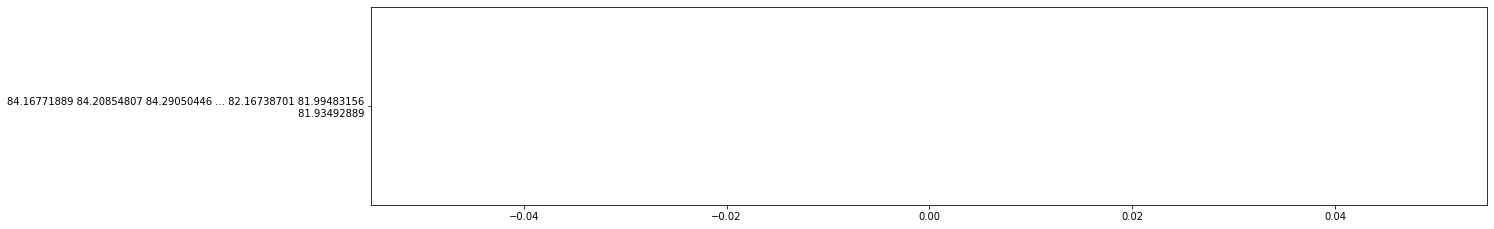

In [ ]:
DATA_PATH = "/content/drive/MyDrive/ACMV1/Stress&Mood/patient_signals_metrics_phys1.csv"

signal_df_ph1 = pd.read_csv(DATA_PATH)



signal_df_ph1.rename(columns={'PANAS_1': 'upset', 'PANAS_2': 'hostile','PANAS_3': 'alert', 'PANAS_4': 'ashamed','PANAS_5': 'inspired', 'PANAS_6': 'nervous','PANAS_7': 'determined', 'PANAS_8': 'attentive','PANAS_9': 'afraid', 'PANAS_10': 'active'}, inplace=True)
signal_df_ph1['PPG'] = signal_df_ph1["PPG"].map(lambda x: str(x).replace('[', ''))
signal_df_ph1['PPG'] = signal_df_ph1["PPG"].map(lambda x: str(x).replace(']', ''))


display(signal_df_ph1)


signal_ppg = np.array(signal_df_ph1['PPG'].iloc[0])




print(signal_ppg)

plotme(signal_ppg)


# print(esm_df['PPGEnd'][esm_df['Participant ID'] == 1001])

# print(signal_df_ph1['EndTime'][signal_df_ph1['Patient'] == 1001])
